In [196]:
import pymysql
import pandas as pd

In [197]:
import pymysql

# соеднинение
conn = pymysql.connect(host='192.168.6.182',user='ml',passwd='ImoralesTuda82',db='metaquotes-demo')

# курсор
cur = conn.cursor()

# Запрос
# 
cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'metaquotes-demo'")

# цикл чтения
for table in [tables[0] for tables in cur.fetchall()]:
    print(table)

mt5_antiddos_servers
mt5_antiddos_sources
mt5_commissions
mt5_commissions_tiers
mt5_deals
mt5_feeder_params
mt5_feeder_translates
mt5_feeders
mt5_firewall
mt5_groups
mt5_groups_symbols
mt5_holidays
mt5_managers
mt5_network
mt5_network_access_servers
mt5_network_antiddos
mt5_network_backup_folders
mt5_network_backup_servers
mt5_network_history_servers
mt5_network_trade_servers
mt5_orders
mt5_orders_history
mt5_plugin_params
mt5_plugins
mt5_positions
mt5_report_params
mt5_reports
mt5_routing
mt5_routing_conds
mt5_routing_dealers
mt5_symbols
mt5_symbols_sessions
mt5_time
mt5_time_weekdays
mt5_users


In [208]:
dfs=pd.read_sql_query("SELECT * FROM mt5_deals LIMIT 10000",conn)
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
dfs.head()

,Deal,Timestamp,ExternalID,Login,Dealer,Order,Action,Entry,Reason,Digits,DigitsCurrency,ContractSize,Time,TimeMsc,Symbol,Price,VolumeExt,Profit,Storage,Commission,Fee,RateProfit,RateMargin,ExpertID,PositionID,Comment,ProfitRaw,PricePosition,PriceSL,PriceTP,VolumeClosedExt,TickValue,TickSize,Flags,Gateway,PriceGateway,ModifyFlags,MarketBid,MarketAsk,MarketLast,Volume,VolumeClosed,ApiData
0,224,128969977978467950,,1052,0,0,2,0,0,2,2,0.0,2009-09-09 21:23:17,1970-01-01,,0.0000,0,100000.0,0.0,0.0,0.0,0.0,0.0000,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,0,0,[]
1,225,128969983226237540,,1052,0,146,0,0,0,4,2,100000.0,2009-09-09 21:32:02,1970-01-01,EURUSD,1.4547,100000000,0.0,0.0,0.0,0.0,0.0,1.4547,0,0,,0.0,0.0,1.4536,1.4552,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,10000,0,[]
2,226,128969983910666390,,1052,0,147,1,1,0,4,2,100000.0,2009-09-09 21:33:11,1970-01-01,EURUSD,1.4541,50000000,-30.0,0.0,0.0,0.0,1.0,1.4541,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,5000,0,[]
3,227,128969985477099335,,1052,0,148,1,1,0,4,2,100000.0,2009-09-09 21:35:47,1970-01-01,EURUSD,1.4542,10000000,-5.0,0.0,0.0,0.0,1.0,1.4542,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
4,231,128969993508186875,,1052,0,151,1,1,0,4,2,100000.0,2009-09-09 21:49:10,1970-01-01,EURUSD,1.4556,40000000,36.0,0.0,0.0,0.0,1.0,1.4556,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,4000,0,[]


In [199]:

# Dates to categoty
Xbs = dfs.astype('category') # разметка

# в Категории
for col in Xbs.select_dtypes(include=['object']).columns:
    #if  col.names == ['Profit']: 
        Xbs[col] = Xbs[col].astype('category')
    
#  декодирование категориальных
        for col in Xbs.select_dtypes(include=['category']).columns:
            Xbs[col] = Xbs[col].cat.codes

Xbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Deal             10000 non-null  category
 1   Timestamp        10000 non-null  category
 2   ExternalID       10000 non-null  category
 3   Login            10000 non-null  category
 4   Dealer           10000 non-null  category
 5   Order            10000 non-null  category
 6   Action           10000 non-null  category
 7   Entry            10000 non-null  category
 8   Reason           10000 non-null  category
 9   Digits           10000 non-null  category
 10  DigitsCurrency   10000 non-null  category
 11  ContractSize     10000 non-null  category
 12  Time             10000 non-null  category
 13  TimeMsc          10000 non-null  category
 14  Symbol           10000 non-null  category
 15  Price            10000 non-null  category
 16  VolumeExt        10000 non-null  category

In [200]:
Xbs.head()

,Deal,Timestamp,ExternalID,Login,Dealer,Order,Action,Entry,Reason,Digits,DigitsCurrency,ContractSize,Time,TimeMsc,Symbol,Price,VolumeExt,Profit,Storage,Commission,Fee,RateProfit,RateMargin,ExpertID,PositionID,Comment,ProfitRaw,PricePosition,PriceSL,PriceTP,VolumeClosedExt,TickValue,TickSize,Flags,Gateway,PriceGateway,ModifyFlags,MarketBid,MarketAsk,MarketLast,Volume,VolumeClosed,ApiData
0,224,128969977978467950,,1052,0,0,2,0,0,2,2,0.0,2009-09-09 21:23:17,1970-01-01,,0.0000,0,100000.0,0.0,0.0,0.0,0.0,0.0000,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,0,0,[]
1,225,128969983226237540,,1052,0,146,0,0,0,4,2,100000.0,2009-09-09 21:32:02,1970-01-01,EURUSD,1.4547,100000000,0.0,0.0,0.0,0.0,0.0,1.4547,0,0,,0.0,0.0,1.4536,1.4552,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,10000,0,[]
2,226,128969983910666390,,1052,0,147,1,1,0,4,2,100000.0,2009-09-09 21:33:11,1970-01-01,EURUSD,1.4541,50000000,-30.0,0.0,0.0,0.0,1.0,1.4541,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,5000,0,[]
3,227,128969985477099335,,1052,0,148,1,1,0,4,2,100000.0,2009-09-09 21:35:47,1970-01-01,EURUSD,1.4542,10000000,-5.0,0.0,0.0,0.0,1.0,1.4542,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
4,231,128969993508186875,,1052,0,151,1,1,0,4,2,100000.0,2009-09-09 21:49:10,1970-01-01,EURUSD,1.4556,40000000,36.0,0.0,0.0,0.0,1.0,1.4556,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,4000,0,[]


In [201]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [209]:
items_df = dfs['ExpertID']

In [213]:
interactions_df = dfs
#interactions_df.fillna
interactions_df

,Deal,Timestamp,ExternalID,Login,Dealer,Order,Action,Entry,Reason,Digits,DigitsCurrency,ContractSize,Time,TimeMsc,Symbol,Price,VolumeExt,Profit,Storage,Commission,Fee,RateProfit,RateMargin,ExpertID,PositionID,Comment,ProfitRaw,PricePosition,PriceSL,PriceTP,VolumeClosedExt,TickValue,TickSize,Flags,Gateway,PriceGateway,ModifyFlags,MarketBid,MarketAsk,MarketLast,Volume,VolumeClosed,ApiData
0,224,128969977978467950,,1052,0,0,2,0,0,2,2,0.0,2009-09-09 21:23:17,1970-01-01,,0.0000,0,100000.00,0.00,0.0,0.0,0.000000,0.0000,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,0,0,[]
1,225,128969983226237540,,1052,0,146,0,0,0,4,2,100000.0,2009-09-09 21:32:02,1970-01-01,EURUSD,1.4547,100000000,0.00,0.00,0.0,0.0,0.000000,1.4547,0,0,,0.0,0.0,1.4536,1.4552,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,10000,0,[]
2,226,128969983910666390,,1052,0,147,1,1,0,4,2,100000.0,2009-09-09 21:33:11,1970-01-01,EURUSD,1.4541,50000000,-30.00,0.00,0.0,0.0,1.000000,1.4541,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,5000,0,[]
3,227,128969985477099335,,1052,0,148,1,1,0,4,2,100000.0,2009-09-09 21:35:47,1970-01-01,EURUSD,1.4542,10000000,-5.00,0.00,0.0,0.0,1.000000,1.4542,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
4,231,128969993508186875,,1052,0,151,1,1,0,4,2,100000.0,2009-09-09 21:49:10,1970-01-01,EURUSD,1.4556,40000000,36.00,0.00,0.0,0.0,1.000000,1.4556,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,4000,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1625223,129312216160171256,,630158,0,1612330,0,1,0,5,2,100000.0,2010-10-11 00:00:16,1970-01-01,USDCHF,0.9606,10000000,-9.63,-0.42,0.0,0.0,1.041016,1.0000,0,1591531,,0.0,0.0,0.9441,0.9771,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
9996,1625224,129312216160171258,,630207,0,1612332,1,0,0,5,2,100000.0,2010-10-11 00:00:16,1970-01-01,USDCAD,1.0103,10000000,0.00,0.00,0.0,0.0,0.000000,1.0000,0,1612332,,0.0,0.0,1.0173,0.9823,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
9997,1625228,129312216170015000,,630309,0,1612336,1,1,0,5,2,100000.0,2010-10-11 00:00:17,1970-01-01,EURAUD,1.4136,20000000,-97.07,-13.95,0.0,0.0,0.990500,1.4000,0,1609431,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,2000,0,[]
9998,1625229,129312216170015002,,630205,0,1612337,0,1,0,5,2,100000.0,2010-10-11 00:00:17,1970-01-01,USDCHF,0.9606,10000000,21.86,-0.30,0.0,0.0,1.041016,1.0000,0,1611591,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]


In [204]:

#articles_df = articles_df[articles_df['Symbol'] == 'EURUSD']
#articles_df.head(5)


In [205]:
#interactions_df = pd.read_csv('interactions.csv')

In [206]:
dfa=pd.read_sql_query("SELECT * FROM mt5_symbols LIMIT 1000000",conn)
# Все колонки
pd.set_option("display.max_columns", None)
dfa.head()

,Symbol_ID,Symbol,Timestamp,Path,ISIN,CFI,Category,Exchange,Description,International,Sector,Industry,Country,Basis,Source,Page,CurrencyBase,CurrencyBaseDigits,CurrencyProfit,CurrencyProfitDigits,CurrencyMargin,CurrencyMarginDigits,Color,ColorBackground,Digits,Point,Multiply,TickFlags,TickBookDepth,TickChartMode,SubscriptionsDelay,FilterSoft,FilterSoftTicks,FilterHard,FilterHardTicks,FilterDiscard,FilterSpreadMax,FilterSpreadMin,FilterGap,FilterGapTicks,TradeMode,TradeFlags,CalcMode,ExecMode,GTCMode,FillFlags,ExpirFlags,OrderFlags,Spread,SpreadBalance,SpreadDiff,SpreadDiffBalance,TickValue,TickSize,ContractSize,StopsLevel,FreezeLevel,QuotesTimeout,VolumeMinExt,VolumeMaxExt,VolumeStepExt,VolumeLimitExt,MarginFlags,MarginInitial,MarginMaintenance,MarginInitialBuy,MarginInitialSell,MarginInitialBuyLimit,MarginInitialSellLimit,MarginInitialBuyStop,MarginInitialSellStop,MarginInitialBuyStopLimit,MarginInitialSellStopLimit,MarginMaintenanceBuy,MarginMaintenanceSell,MarginMaintenanceBuyLimit,MarginMaintenanceSellLimit,MarginMaintenanceBuyStop,MarginMaintenanceSellStop,MarginMaintenanceBuyStopLimit,MarginMaintenanceSellStopLimit,MarginRateLiquidity,MarginHedged,MarginRateCurrency,SwapMode,SwapLong,SwapShort,Swap3Day,SwapYearDay,TimeStart,TimeExpiration,REFlags,RETimeout,IECheckMode,IETimeout,IESlipProfit,IESlipLosing,IEVolumeMaxExt,PriceSettle,PriceLimitMax,PriceLimitMin,PriceStrike,OptionMode,FaceValue,AccruedInterest,SpliceType,SpliceTimeType,SpliceTimeDays,VolumeMin,VolumeMax,VolumeStep,VolumeLimit,IEVolumeMax
0,1,EURUSD,132701299070238567,Forex\EURUSD,,,,,Euro vs US Dollar,,12,0,,,,http://www.google.com/finance?q=EURUSD,EUR,2,USD,2,EUR,2,0,4278190080,5,0.00001,100000.0,3,10,0,15,300,3,600,3,30000,400,0,0,0,4,2,0,1,0,1,15,127,0,0,0,0,0.0,0.0,100000.0,0,0,600,1000000,50000000000,1000000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,1,-0.7,-1.0,3,3,1970-01-01,1970-01-01,0,7,0,7,2,2,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,100,5000000,100,0,0
1,2,GBPUSD,132701299070238568,Forex\GBPUSD,,,,,Pound Sterling vs US Dollar,,12,0,,,,http://www.google.com/finance?q=GBPUSD,GBP,2,USD,2,GBP,2,0,4278190080,5,0.00001,100000.0,3,10,0,15,300,3,600,3,30000,0,0,0,0,4,2,0,1,0,1,7,127,0,0,0,0,0.0,0.0,100000.0,0,0,600,1000000,50000000000,1000000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,1,-0.2,-2.2,3,3,1970-01-01,1970-01-01,0,7,0,7,2,2,1000000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,100,5000000,100,0,100000
2,3,USDCHF,132701299070238569,Forex\USDCHF,,,,,US Dollar vs Swiss Franc,,12,0,,,,http://www.google.com/finance?q=USDCHF,USD,2,CHF,2,USD,2,0,4278190080,5,0.00001,100000.0,3,10,0,15,200,3,400,3,30000,400,0,0,0,4,2,0,1,0,1,7,127,0,0,0,0,0.0,0.0,100000.0,0,0,600,1000000,50000000000,1000000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,1,0.1,-1.0,3,3,1970-01-01,1970-01-01,0,7,0,7,2,2,1000000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,100,5000000,100,0,100000
3,4,USDJPY,132701299070238570,Forex\USDJPY,,,,,US Dollar vs Yen,,12,0,,,,http://www.google.com/finance?q=USDJPY,USD,2,JPY,0,USD,2,0,4278190080,3,0.00100,1000.0,3,10,0,15,300,3,600,3,30000,400,0,0,0,4,2,0,1,0,1,7,127,0,0,0,0,0.0,0.0,100000.0,0,0,600,1000000,50000000000,1000000,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,1,-0.1,-0.6,3,3,1970-01-01,1970-01-01,0,7,0,7,2,2,1000000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,100,5000000,100,0,100000
4,5,USDCNH,132701299070238571,Forex\USDCNH,,,,,US Dollar vs Chinese Yuan,,12,0,,,,https://www.google.com/finance?q=USDCNH,USD,2,CNH,2,USD,2,4278190080,4278190080,5,0.00001,100000.0,1,32,0,15,0,1,0,1,0,0,0,0,0,4,2,0,1,0,3,7,127,0,0,0,0,0.0,0.0,100000.0,0,0,0,1000000,100000000000,1000000,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,100000.0,0.0,0,0.0,0.0,3,3,1970-01-01,1970-01-01,0,7,0,7,2,2,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,100,10000000,100,0,0


In [141]:
#articles_df = dfa
#articles_df.fillna

In [142]:


#articles_df = pd.read_csv('articles.csv')
#articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
#articles_df.head(5)


In [218]:


def event_type_strength(eventd):
    if (eventd < 0):
        return 0
    elif (eventd >= 0):
        return 1
 
    else:
        return 0

interactions_df['eventStrength'] = interactions_df['Profit'].apply(event_type_strength)





In [144]:
users_interactions_count_df = interactions_df.groupby(['Login', 'ExpertID']).size().groupby('Login').size()
print('# users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['Login']]
print('# users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))



# users: 1294
# users with at least 5 interactions: 1294


In [145]:
interactions_df['eventStrength']

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: eventStrength, Length: 10000, dtype: int64

In [146]:
print('# of interactions: %d' % len(interactions_df))
interactions_from_selected_users_df = interactions_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'Login',
               right_on = 'Login')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))


# of interactions: 10000
# of interactions from users with at least 5 interactions: 10000


In [147]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df \
                    .groupby(['Login', 'ExpertID'])['eventStrength'].sum() \
                    .apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(5)


# of unique user/item interactions: 225156


,Login,ExpertID,eventStrength
0,100,0,1.0
1,100,1,0.0
2,100,2,0.0
3,100,3,0.0
4,100,4,0.0


In [148]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['Login'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))


# interactions on Train set: 180124
# interactions on Test set: 45032


In [149]:
#Индесирование по Login трейдеров
interactions_full_indexed_df = interactions_full_df.set_index('Login')
interactions_train_indexed_df = interactions_train_df.set_index('Login')
interactions_test_indexed_df = interactions_test_df.set_index('Login')


In [150]:
#user_profiles = interactions_full_df['Login']
#user_profiles = user_profiles[0:len(interactions_train_indexed_df)]

In [151]:
def get_items_interacted(person_id, interactions_df):
    # Get the user's data and merge in the movie information.
    interacted_items = interactions_df.loc[person_id]['ExpertID']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])


In [152]:
set(interactions_df['ExpertID'])

{0,
 1,
 2,
 3,
 4,
 5,
 7,
 12,
 13,
 19,
 20,
 22,
 32,
 42,
 52,
 62,
 100,
 101,
 102,
 119,
 122,
 131,
 145,
 147,
 168,
 234,
 258,
 268,
 325,
 348,
 425,
 446,
 600,
 602,
 653,
 654,
 666,
 668,
 727,
 777,
 867,
 888,
 999,
 1000,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1101,
 1212,
 1234,
 1305,
 1954,
 2000,
 2222,
 3002,
 3008,
 3141,
 4002,
 4575,
 4576,
 4985,
 5000,
 7505,
 9990,
 9991,
 9999,
 10000,
 12345,
 12349,
 13579,
 16232,
 17849,
 19991,
 31337,
 31598,
 32599,
 45000,
 54321,
 55001,
 55555,
 56789,
 73512,
 76647,
 77777,
 81001,
 88888,
 99977,
 100000,
 100005,
 101021,
 102938,
 110575,
 123123,
 123456,
 130104,
 160200,
 160201,
 160202,
 160300,
 160302,
 200489,
 200508,
 201009,
 234039,
 343434,
 356720,
 401021,
 415005,
 423347,
 478122,
 530008,
 615013,
 701005,
 801008,
 805013,
 901021,
 1002011,
 1102010,
 1234560,
 1234567,
 1555838,
 1598440,
 1598455,
 1601637,
 2264789,
 2553629,
 4211689,
 5150081,
 6482507,
 6482537,


In [153]:
#Топ N результатов
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 10



class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(interactions_df['ExpertID'])
        
        non_interacted_items = all_items # - interacted_items 
         

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Тестовая выборка
        interacted_values_testset = interactions_test_indexed_df.loc[person_id] # провзаимодейстовавшие
        if type(interacted_values_testset['ExpertID']) == pd.Series: # проверка на принадлежность данных в типу
            person_interacted_items_testset = set(interacted_values_testset['ExpertID'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ExpertID'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    interactions_train_indexed_df), 
                                               topn=10)

        hits_at_5_count = 0 # топ 5
        hits_at_10_count = 0
        #Для каждого наименования юзер провзаимодействовал или нет
        for item_id in person_interacted_items_testset:
            #рандомный экземпляр
            #релевантные экземпляры 
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(20))
            #Текущие взаимодейтсвия с реклевантными
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Фильтрация релевантных и случайных от всекй выборки
            valid_recs_df = person_recs_df[person_recs_df['ExpertID'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ExpertID'].values
            #Проверка на наличие среди самых популярных
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall это уровень прнаджлежности к топ 10 Espert ID
        #rjulf cvtifyys c ythtktdfynysvb
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            #if idx % 100 == 0 and idx > 0:
            #    print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': np.round(global_recall_at_5,2) * 100,
                          'recall@10': np.round(global_recall_at_10, 2) * 100}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [154]:
#Пиворот таблицав с пользовавтелями в рядах ExpertIF в колонках
users_items_pivot_matrix_df = interactions_train_df.pivot(index='Login', 
                                                          columns='ExpertID', 
                                                          values='eventStrength').fillna(0)

users_items_pivot_matrix_df.head(5)


ExpertID,0,1,2,3,4,5,7,12,13,19,20,22,32,42,52,62,100,101,102,119,122,131,145,147,168,234,258,268,325,348,425,446,600,602,653,654,666,668,727,777,867,888,999,1000,1024,1025,1026,1027,1028,1029,1030,1031,1101,1212,1234,1305,1954,2000,2222,3002,3008,3141,4002,4575,4576,4985,5000,7505,9990,9991,9999,10000,12345,12349,13579,16232,17849,19991,31337,31598,32599,45000,54321,55001,55555,56789,73512,76647,77777,81001,88888,99977,100000,100005,101021,102938,110575,123123,123456,130104,160200,160201,160202,160300,160302,200489,200508,201009,234039,343434,356720,401021,415005,423347,478122,530008,615013,701005,801008,805013,901021,1002011,1102010,1234560,1234567,1555838,1598440,1598455,1601637,2264789,2553629,4211689,5150081,6482507,6482537,6482625,6658641,7092010,7161800,7183420,7789542,8844552,9977661,19680213,19782010,20100610,20100826,20100925,45434565,56547689,80216907,99220001,102092010,178538190,202092010,1007120010,1008030010,1008120010,1008190010,1234567890,1286187300,1286476200,5854903606,19860506111,19860506222,19860506333,720335156333,192421501297754112,214003239513751552,392831280988815361,392832517939396609,392833067695210497,392833617451024385,392834682602913793
Login,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1052,3.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21738,0.000000,0.0,0.0,0.0,8.682995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.857981,0.0,0.0,0.0,0.0,9.167418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.584963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94489,2.807355,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.807355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [155]:
users_items_pivot_matrix = users_items_pivot_matrix_df.to_numpy()
users_ids = list(users_items_pivot_matrix_df.index)
#item_ids = list(users_items_pivot_matrix_df.index)
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)


In [156]:
#Параметры для фаторизации
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
#U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)


In [157]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

In [158]:
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())


In [159]:
#Конвертация в датафрейм
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(5)


100       1052      21738     94489     630001    630002  \
ExpertID                                                               
0         0.151843  0.358747  0.048368  0.338884  0.315810  0.256280   
1         0.048399  0.048414  0.048398  0.048402  0.048411  0.048109   
2         0.048438  0.048531  0.048396  0.048460  0.048512  0.048293   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048359  0.048296  0.943836  0.048385  0.048309  0.048470   

            630003    630004    630005    630006    630007    630008  \
ExpertID                                                               
0         0.255295  0.151944  0.255295  0.565650  0.212422  0.315885   
1         0.048407  0.048369  0.048407  0.048430  0.048385  0.048399   
2         0.048485  0.048423  0.048485  0.048625  0.048456  0.048441   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048327  0.048371  0.048327  0.048232  0.048348  0.048402   

            630009    630010    630011    630012    630013    630014  \
ExpertID                                                               
0         0.550958  0.151843  0.212740  0.212583  0.048391  0.656961   
1         0.048429  0.048399  0.048288  0.048338  0.048391  0.048437   
2         0.048618  0.048438  0.048396  0.048431  0.048391  0.048666   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048237  0.048359  0.048394  0.048368  0.048391  0.048204   

            630015    630016    630017    630018    630019    630020  \
ExpertID                                                               
0         0.151843  0.256029  0.360655  0.742992  0.358747  0.151843   
1         0.048399  0.048186  0.047834  0.048444  0.048414  0.048399   
2         0.048438  0.048356  0.048101  0.048705  0.048531  0.048438   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048359  0.048427  0.048594  0.048178  0.048296  0.048359   

            630021    630022    630023    630024    630025    630026  \
ExpertID                                                               
0         0.151843  0.358747  0.212519  0.317083  0.212449  0.587319   
1         0.048399  0.048414  0.048357  0.048026  0.048389  0.048432   
2         0.048438  0.048531  0.048442  0.048264  0.048380  0.048635   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048359  0.048296  0.048360  0.048494  0.048453  0.048226   

            630027    630028    630029    630030    630031    630032  \
ExpertID                                                               
0         0.048391  0.444561  0.452566  0.255731  0.619814  0.151843   
1         0.048391  0.047724  0.048422  0.048278  0.048434  0.048399   
2         0.048391  0.048072  0.048574  0.048416  0.048649  0.048438   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048391  0.048622  0.048267  0.048383  0.048216  0.048359   

            630033    630034    630035    630036    630037    630038  \
ExpertID                                                               
0         0.316375  0.255497  0.048391  0.376507  0.255295  0.151843   
1         0.048245  0.048348  0.048391  0.048376  0.048407  0.048399   
2         0.048423  0.048455  0.048391  0.048416  0.048485  0.048438   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048380  0.048352  0.048391  0.048368  0.048327  0.048359   

            630039    630040    630041    630042    630043    630044  \
ExpertID                                                               
0         0.212358  0.152004  0.152165  0.315871  0.152004  0.048485   
1         0.048403  0.048351  0.048303  0.048401  0.048351  0.319998   
2         0.048465  0.048413  0.048383  0.048454  0.048413  0.191122   
3         0.048391  0.048391  0.048391  0.048391  0.048391  0.048391   
4         0.048341  0.048379  0.048402  0.048

In [160]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Сбор и сортировка предсказаний и готлосов трейдеров
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        # Рекомендации не использовыанных роботов
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ExpertID'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'right', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['ExpertID', 'recStrength']]


        return recommendations_df.dropna().head(topn*10)


In [161]:
cf_preds_df

100       1052      21738     94489     630001  \
ExpertID                                                               
0                   0.151843  0.358747  0.048368  0.338884  0.315810   
1                   0.048399  0.048414  0.048398  0.048402  0.048411   
2                   0.048438  0.048531  0.048396  0.048460  0.048512   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048359  0.048296  0.943836  0.048385  0.048309   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048542  0.048845  0.048401  0.048613  0.048782   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048542  0.048845  0.048401  0.048613  0.048782   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048542  0.048845  0.048401  0.048613  0.048782   

                      630002    630003    630004    630005    630006  \
ExpertID                                                               
0                   0.256280  0.255295  0.151944  0.255295  0.565650   
1                   0.048109  0.048407  0.048369  0.048407  0.048430   
2                   0.048293  0.048485  0.048423  0.048485  0.048625   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048470  0.048327  0.048371  0.048327  0.048232   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048704  0.048693  0.048543  0.048693  0.049147   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048704  0.048693  0.048543  0.048693  0.049147   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048704  0.048693  0.048543  0.048693  0.049147   

                      630007    630008    630009    630010    630011  \
ExpertID                                                               
0                   0.212422  0.315885  0.550958  0.151843  0.212740   
1                   0.048385  0.048399  0.048429  0.048399  0.048288   
2                   0.048456  0.048441  0.048618  0.048438  0.048396   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048348  0.048402  0.048237  0.048359  0.048394   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048631  0.048553  0.049126  0.048542  0.048634   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048631  0.048553  0.049126  0.048542  0.048634   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048631  0.048553  0.049126  0.048542  0.048634   

                      630012    630013    630014    630015    630016  \
ExpertID                                                               
0                   0.212583  0.048391  0.656961  0.151843  0.256029   
1                   0.048338  0.048391  0.048437  0.048399  0.048186   
2                   0.048431  0.048391  0.048666  0.048438  0.048356   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048368  0.048391  0.048204  0.048359  0.048427   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048632  0.048391  0.049281  0.048542  0.048700   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048632  0.048391  0.049281  0.048542  0.048700   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048632  0.048391  0.049281  0.048542  0.048700   

                      630017    630018    630019    630020    630021  \
ExpertID                                                               
0                   0.360655  0.742992  0.358747  0.151843  0.151843   
1                   0.047834  0.048444  0.048414  0.048399

In [106]:
#recsys

In [107]:

#Computes the most popular items
item_popularity_df = interactions_full_df.groupby('ExpertID')['eventStrength'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)


,ExpertID,eventStrength
0,0,1743.198073
1,12345,115.682184
2,1,30.841182
3,777,20.055505
4,2,11.455327
5,1024,10.167418
6,999,9.321928
7,4,8.682995
8,666,7.906891
9,867,7.366322


In [110]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        #Рекормендлация наболле популярных из тех, что не ипользовал трейдер
        recommendations_df = self.popularity_df[~self.popularity_df['ExpertID'].isin(items_to_ignore)] \
                               .sort_values('eventStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['eventStrength', 'ExpertID']]


        return recommendations_df
    
popularity_model = PopularityRecommender(item_popularity_df, interactions_df)

In [109]:
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, items_df=None,item_ids = None):
        self.item_ids = item_ids
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_items_to_user_profile(self, person_id, topn=1000):
        #Computes the cosine тождественность между пользхователями - надо внести данные из БД
        # например похожите наборы действий по времени  tfidf_matrix = df['Actions','Deals'....]
        cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
        #Похожие роботы
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Сортировка
        similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_items
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        similar_items = self._get_similar_items_to_user_profile(user_id)
        #Игнорирование провзаимодействовавших
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))
        
        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['ExpertID', 'recStrength']) \
                                    .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['recStrength', 'ExpertID']]


        return recommendations_df
    
content_based_recommender_model = ContentBasedRecommender(interactions_df)

In [56]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        #Получение и сортировка рекомендация 
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        # Рккомендация наиболее популярных из неиспользуемых
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ExpertID'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['recStrength', 'ExpertID']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, interactions_df)

In [183]:
class CCFRecommenderD:
    
    import random
    
    MODEL_NAME = 'Collaborative Cascade Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
    
    def user_cascade(score):
        #score = [1,1,1,1,1,1,1000]
        def get_ignition(self, user_id,items,score):
            randomlist = []
            for i in range(0,items):
                n = random.randint(1,10)
                randomlist.append(n)
        for i in user_id:   
            if items.score == n:     
                user[randomlist] = get_ignition[user_id,items,score]
            

                
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Сортировка рейтинга пользователей
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        # Сам ый высокий из неувиденных
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ExpertID'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['recStrength', 'ExpertID']]


        return recommendations_df
    
cf_recommender_modelc = CCFRecommenderD(cf_preds_df, interactions_df) #CFRecommender(cf_preds_df, interactions_df)

In [184]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_modelc)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1293 users processed

Global metrics:
{'modelName': 'Collaborative Cascade Filtering', 'recall@5': 28.999999999999996, 'recall@10': 28.999999999999996}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
0,10,10,35,0.285714,0.285714,630119
576,10,10,35,0.285714,0.285714,660619
812,10,10,35,0.285714,0.285714,661228
811,10,10,35,0.285714,0.285714,660759
810,10,10,35,0.285714,0.285714,661184
808,10,10,35,0.285714,0.285714,660966
807,10,10,35,0.285714,0.285714,661218
806,10,10,35,0.285714,0.285714,630211
805,10,10,35,0.285714,0.285714,661135
804,10,10,35,0.285714,0.285714,660987


In [175]:
class HybridRecommender:

    items_df = Xbs['ExpertID']   
    
    
    MODEL_NAME = 'Hybrid'
    
    def __init__(self, cb_rec_model, cf_rec_model, items_df = Xbs['ExpertID'], cb_ensemble_weight=1.0, cf_ensemble_weight=1.0):
        self.cb_rec_model = cb_rec_model
        self.cf_rec_model = cf_rec_model
        self.cb_ensemble_weight = cb_ensemble_weight
        self.cf_ensemble_weight = cf_ensemble_weight
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        #топ 100 исходя из контента
        cb_recs_df = self.cb_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose,
                                                           topn=10).rename(columns={'recStrength': 'recStrengthCB'})
        
        #топ 1000 из CF 
        cf_recs_df = self.cf_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose, 
                                                           topn=10).rename(columns={'recStrength': 'recStrengthCF'})
        
        #Объединение резульатов
        recs_df = cb_recs_df.merge(cf_recs_df,
                                   how = 'outer', 
                                   left_on = 'ExpertID', 
                                   right_on = 'Login').fillna(0.0)
        
        #CF и CB оценки
        #recs_df['recStrengthHybrid'] = recs_df['recStrengthCB'] * recs_df['recStrengthCF'] 
        recs_df['recStrengthHybrid'] = (recs_df['recStrengthCB'] * self.cb_ensemble_weight) \
                                     + (recs_df['recStrengthCF'] * self.cf_ensemble_weight)
        
        #Sorting recommendations by hybrid score
        recommendations_df = recs_df.sort_values('recStrengthHybrid', ascending=False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['recStrengthHybrid', 'ExpertID','Action','Dealer']]


        return recommendations_df
    
hybrid_recommender_model = HybridRecommender(content_based_recommender_model, cf_recommender_model, interactions_df,
                                             cb_ensemble_weight=1.0, cf_ensemble_weight=100.0)

In [ ]:
print('Evaluating Hybrid model...')
hybrid_global_metrics, hybrid_detailed_results_df = model_evaluator.evaluate_model(hybrid_recommender_model)
print('\nGlobal metrics:\n%s' % hybrid_global_metrics)
hybrid_detailed_results_df.head(10)

In [ ]:
recsys = PopularityRecommender(item_popularity_df, interactions_df)

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')


In [176]:
recsys = HybridRecommender(item_popularity_df, interactions_df)

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')


Evaluating Collaborative Filtering (SVD Matrix Factorization) model...


In [76]:
recsys = ContentBasedRecommender(item_popularity_df, interactions_df)




In [180]:
recsys = CCFRecommenderD(cf_preds_df, interactions_df['Login'])

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...


In [177]:
d = ModelEvaluator
print(d.evaluate_model_for_user)

<function ModelEvaluator.evaluate_model_for_user at 0x000001854E8718B0>


In [81]:
interactions_train_indexed_df

,ExpertID,eventStrength
Login,,
630090,7183420,0.0
661338,20100610,0.0
661014,1555838,0.0
661079,356720,0.0
630160,160201,0.0
...,...,...
661604,9991,0.0
661009,19991,0.0
661300,600,0.0


In [181]:
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(recsys)
print('\nGlobal metrics:\n%s' % cf_global_metrics)

1293 users processed

Global metrics:
{'modelName': 'Collaborative Cascade Filtering', 'recall@5': 28.999999999999996, 'recall@10': 28.999999999999996}


In [71]:
cf_detailed_results_df.sort_values('interacted_count',ascending = False)


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
0,10,10,35,0.285714,0.285714,630119
198,10,10,35,0.285714,0.285714,661505
83,10,10,35,0.285714,0.285714,661348
343,10,10,35,0.285714,0.285714,630232
333,10,10,35,0.285714,0.285714,661360
...,...,...,...,...,...,...
398,10,10,34,0.294118,0.294118,630262
793,10,10,34,0.294118,0.294118,660771
823,10,10,34,0.294118,0.294118,660959
352,10,10,34,0.294118,0.294118,660866


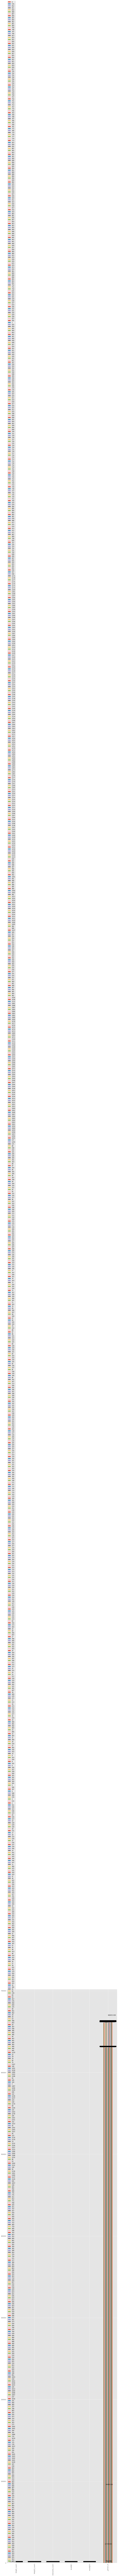

In [418]:
%matplotlib inline
ax = cf_detailed_results_df.transpose().plot(kind='bar', figsize=(15,80))
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



In [185]:
cf_preds_df

100       1052      21738     94489     630001  \
ExpertID                                                               
0                   0.151843  0.358747  0.048368  0.338884  0.315810   
1                   0.048399  0.048414  0.048398  0.048402  0.048411   
2                   0.048438  0.048531  0.048396  0.048460  0.048512   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048359  0.048296  0.943836  0.048385  0.048309   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048542  0.048845  0.048401  0.048613  0.048782   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048542  0.048845  0.048401  0.048613  0.048782   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048542  0.048845  0.048401  0.048613  0.048782   

                      630002    630003    630004    630005    630006  \
ExpertID                                                               
0                   0.256280  0.255295  0.151944  0.255295  0.565650   
1                   0.048109  0.048407  0.048369  0.048407  0.048430   
2                   0.048293  0.048485  0.048423  0.048485  0.048625   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048470  0.048327  0.048371  0.048327  0.048232   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048704  0.048693  0.048543  0.048693  0.049147   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048704  0.048693  0.048543  0.048693  0.049147   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048704  0.048693  0.048543  0.048693  0.049147   

                      630007    630008    630009    630010    630011  \
ExpertID                                                               
0                   0.212422  0.315885  0.550958  0.151843  0.212740   
1                   0.048385  0.048399  0.048429  0.048399  0.048288   
2                   0.048456  0.048441  0.048618  0.048438  0.048396   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048348  0.048402  0.048237  0.048359  0.048394   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048631  0.048553  0.049126  0.048542  0.048634   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048631  0.048553  0.049126  0.048542  0.048634   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048631  0.048553  0.049126  0.048542  0.048634   

                      630012    630013    630014    630015    630016  \
ExpertID                                                               
0                   0.212583  0.048391  0.656961  0.151843  0.256029   
1                   0.048338  0.048391  0.048437  0.048399  0.048186   
2                   0.048431  0.048391  0.048666  0.048438  0.048356   
3                   0.048391  0.048391  0.048391  0.048391  0.048391   
4                   0.048368  0.048391  0.048204  0.048359  0.048427   
...                      ...       ...       ...       ...       ...   
392831280988815361  0.048632  0.048391  0.049281  0.048542  0.048700   
392832517939396609  0.048391  0.048391  0.048391  0.048391  0.048391   
392833067695210497  0.048632  0.048391  0.049281  0.048542  0.048700   
392833617451024385  0.048391  0.048391  0.048391  0.048391  0.048391   
392834682602913793  0.048632  0.048391  0.049281  0.048542  0.048700   

                      630017    630018    630019    630020    630021  \
ExpertID                                                               
0                   0.360655  0.742992  0.358747  0.151843  0.151843   
1                   0.047834  0.048444  0.048414  0.048399

In [ ]:
## Варианты интеграции с Catboost

In [ ]:
#interactions_df = pd.read_csv('interactions.csv')
interactions_df.head(10)

In [44]:


#Computes the most popular items
item_popularity_df = interactions_full_df.groupby('ExpertID')['eventStrength'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)



,ExpertID,eventStrength
0,0,1743.198073
1,12345,115.682184
2,1,30.841182
3,777,20.055505
4,2,11.455327
5,1024,10.167418
6,999,9.321928
7,4,8.682995
8,666,7.906891
9,867,7.366322


In [388]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Рекомендации по неиспользлованным роботам
        recommendations_df = self.popularity_df[~self.popularity_df['ExpertID'].isin(items_to_ignore)] \
                               .sort_values('eventStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['eventStrength', 'ExpertID']]


        return recommendations_df
    
popularity_model = PopularityRecommender(item_popularity_df, interactions_df)

In [ ]:
#train_data = dff['eventStrength','cousine_similarity'.....]
#train_labels = dff['ExpertID ']

In [124]:
train_data = item_popularity_df['ExpertID']
train_labels = item_popularity_df['eventStrength']


In [117]:

# Load Python libraries
from sklearn import metrics, ensemble
import xgboost as xgb
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings


import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [127]:
%%time 
# тестирование классов по метке 'Symbol'
model0 = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=20, verbose = True)
model0.fit(train_data, train_labels) #Event Strencght
test_data = train_data # для начала
# Predicting
predict_labels0 = model0.predict(test_data)



0:	learn: 3.6857962	total: 326ms	remaining: 6.2s
1:	learn: 3.6187945	total: 649ms	remaining: 5.84s
2:	learn: 3.5481030	total: 974ms	remaining: 5.52s
3:	learn: 3.4695304	total: 1.3s	remaining: 5.19s
4:	learn: 3.3975287	total: 1.62s	remaining: 4.86s
5:	learn: 3.3382756	total: 1.95s	remaining: 4.55s
6:	learn: 3.2551686	total: 1.95s	remaining: 3.63s
7:	learn: 3.2052599	total: 2.27s	remaining: 3.41s
8:	learn: 3.1543667	total: 2.44s	remaining: 2.98s
9:	learn: 3.1076167	total: 2.76s	remaining: 2.76s
10:	learn: 3.0621983	total: 3.08s	remaining: 2.52s
11:	learn: 3.0140810	total: 3.11s	remaining: 2.07s
12:	learn: 2.9731830	total: 3.43s	remaining: 1.84s
13:	learn: 2.9323099	total: 3.75s	remaining: 1.61s
14:	learn: 2.9013184	total: 4.08s	remaining: 1.36s
15:	learn: 2.8708651	total: 4.4s	remaining: 1.1s
16:	learn: 2.8421799	total: 4.72s	remaining: 834ms
17:	learn: 2.8113439	total: 5.05s	remaining: 561ms
18:	learn: 2.7801735	total: 5.38s	remaining: 283ms
19:	learn: 2.7513156	total: 5.69s	remaining: 

In [126]:
%%time 
# тестирование классов по метке 'Symbol'
model1 = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=20,verbose = True)
model1.fit(train_data, train_labels)
test_data = train_data
# Predicting
predict_labels1 = model1.predict(test_data)


0:	learn: 3.6857962	total: 327ms	remaining: 6.21s
1:	learn: 3.6187945	total: 652ms	remaining: 5.87s
2:	learn: 3.5481030	total: 977ms	remaining: 5.54s
3:	learn: 3.4695304	total: 1.3s	remaining: 5.21s
4:	learn: 3.3975287	total: 1.63s	remaining: 4.88s
5:	learn: 3.3382756	total: 1.95s	remaining: 4.55s
6:	learn: 3.2551686	total: 1.95s	remaining: 3.63s
7:	learn: 3.2052599	total: 2.27s	remaining: 3.41s
8:	learn: 3.1543667	total: 2.43s	remaining: 2.98s
9:	learn: 3.1076167	total: 2.76s	remaining: 2.76s
10:	learn: 3.0621983	total: 3.08s	remaining: 2.52s
11:	learn: 3.0140810	total: 3.1s	remaining: 2.07s
12:	learn: 2.9731830	total: 3.43s	remaining: 1.84s
13:	learn: 2.9323099	total: 3.75s	remaining: 1.61s
14:	learn: 2.9013184	total: 4.07s	remaining: 1.36s
15:	learn: 2.8708651	total: 4.4s	remaining: 1.1s
16:	learn: 2.8421799	total: 4.73s	remaining: 834ms
17:	learn: 2.8113439	total: 5.05s	remaining: 561ms
18:	learn: 2.7801735	total: 5.37s	remaining: 283ms
19:	learn: 2.7513156	total: 5.7s	remaining: 0

In [72]:
predict_labelsarticles = [];
predict_labels_interactions = [];
recommend = [];

In [118]:
class Catboost_recommend:
    
    def _init__(self, items_df=None):
        self.predict_labelsarticles = predict_labelsarticles
        self.predict_labels_interactions = predict_labels_interactions
        #self.recommend = recommend
        
    #def forward(X,y):
        #DN-> catboost(X)
        
    def get_model_name(self):
        return self.MODEL_NAME

    def catboost_similarityf(self, contentID, data):
        %%time 
       # тестирование классов по метке 'Symbol'
        model0 = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=20, verbose = True)
        model0.fit(train_data, train_labels)
    
        # Predicting
        predict_labels0 = model0.predict(test_data)
     
         # тестирование классов по метке 'Symbol'
        model1 = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=20,verbose = True)
        model1.fit(train_data, train_labels)

        # Predicting
        predict_labels1 = model1.predict(test_data)
    
        for i in test_data[len]:
            if predict_labelsarticles[i] == predict_labels_interactions[i]:
                recommend[i] = predict_labelsarticles[i]



In [119]:
#####################################################################################################

In [120]:
d = Catboost_recommend

k = d.catboost_similarityf

In [121]:
print(k)

<function Catboost_recommend.catboost_similarityf at 0x0000020C38AFEB80>


In [47]:
class Catboostdn:
    
    def _init__(self, items_df=None):
        self.item_ids = item_ids
        self.items_df = items_df
        
    #def forward(X,y):
        #DN-> catboost(X)
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_items_to_user_profile(self, login_id, topn=1000):
        #Тождественность профиля (описание алгоритмов используемых пользователем) и описания робота - возможно сопоставление тождественности алгоритма с ранее использованными
        catboost_similarities = catboost_similarities(user_profiles[login_id], tfidf_matrix)
        #Схожие Рооботы
        similar_indices = catboost_similarities.argsort().flatten()[-topn:]
        #Сортировка похожих
        similar_items = sorted([(item_ids[i], catboost_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        #print(user_profiles[login_id])
        return similar_items    
    
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        similar_items = self._get_similar_items_to_user_profile(user_id)
        #Игнорирование провозаимодейстовавших
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))
        
        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['ExpertID', 'recStrength']) \
                                    .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ExpertID', 
                                                          right_on = 'ExpertID')[['recStrength', 'ExpertID']]


        return recommendations_df
    
#content_based_recommender_model = ContentBasedRecommender(articles_df)


In [48]:
##################################################################################################

In [ ]:
event_type_strength = {
   'USDRUB' : lambda x,y: 10 if (eval(x)==0) else eval(y),
   'USDRUB' : lambda x,y: 0 if (eval(x)==0) else eval(y),
   'GBPUSD' : lambda x,y: 1 if (eval(x)<eval(y)) else 0,
   'USDCHF' : lambda x,y: 2 if (eval(x*4)>eval(y)) else 0,
}
#x = ['signal']
#y = ['robot0']
#interactions_df['eventStrength'] = interactions_df['Symbol'].apply(lambda x: event_type_strength[x])

In [ ]:
# декодировки для Symbols

def my_recode(eventd):
    if (eventd == "USDRUB'") or (eventd == "RUBUSD"):
        return 1
    elif (eventd == "EURUSD") or (eventd == "USDEUR"):
        return 2
    elif (eventd == "GBPUSD") or (eventd == "USDGPB"):
        return 3
    elif (eventd == "USDCHF") or (eventd == "CHFUSD") : 
        return 4
    elif (eventd == "USDJPY") or (eventd == "JPYUSD"):
        return 5
    elif (eventd == "USDCNH") or (eventd == "CNHUSD"):
        return 6
    elif (eventd == "AUDUSD") or (eventd == "USDAUD"):
        return 6
    elif (eventd == "NZDUSD") or (eventd == "USDNZD"):
        return 6
    elif (eventd == "USDCAD") or (eventd == "CADUSD"):
        return 6
    elif (eventd == "USDSGD") or (eventd == "USDCNH"):
        return 6
    
    else:
        return 0

interactions_df['eventstrength_total'] = interactions_df['Symbol'].apply(my_recode)